# Create a colorful, stylized, mountain range

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

/var/folders/ch/xjfv0p891_l_n4ssnks_384m0000gn/T/ipykernel_44747/2640358022.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_turbo = cm.get_cmap('turbo')


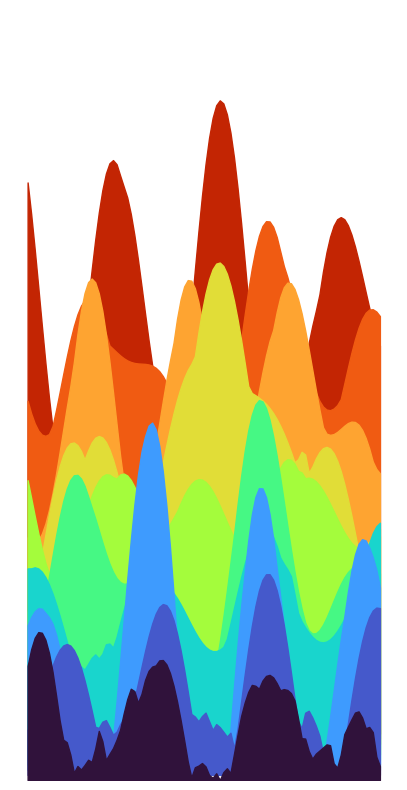

In [13]:
# make a figure
f = plt.figure(figsize=(5, 10))

# get the turbo colormap
cmap_turbo = cm.get_cmap('turbo')

# add a single subplot to the figure
# with empy x ticks and y ticklables
# and no axes shown
ax = f.add_subplot(111, xticks=[], yticks=[])
ax.set_axis_off()

# set the limits to the x and y axes
ax.set_ylim([0, 2 * np.pi])
ax.set_ylim([0, 15])

# create an x array [0, 2π]
x = np.linspace(0, 2 * np.pi, 100)

# set the number of mountain ranges
num_mr = 10

# set the number of peaks in each range
npeak = 10

for i in range(num_mr):
    # set the color of the mountain range
    # by providing a number [0, 1]
    mr_color = cmap_turbo(float(i) / float(npeak))

    # create a frequency
    freq = 3 * np.random.rand(npeak) + 1

    # create a phase
    phase = 2 * np.pi * np.random.rand(npeak)

    # amplitude
    amp = np.random.rand(npeak) + 0.1

    # set an y offset so each range is offset along the y direction
    y_offset = 0.1 * float(i)

    # create the mountain range
    y = np.zeros_like(x)

    # for every peak
    for j in range(npeak):
        # add this peak as a sine curve
        y += amp[j] * np.sin(freq[j] * x + phase[j])

        y = np.fabs(y) + y_offset

    plt.fill_between(x, y, y_offset, zorder=num_mr-i, color=mr_color, cmap='turbo')

plt.show()

/var/folders/ch/xjfv0p891_l_n4ssnks_384m0000gn/T/ipykernel_44747/2159917416.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_turbo = cm.get_cmap('turbo')


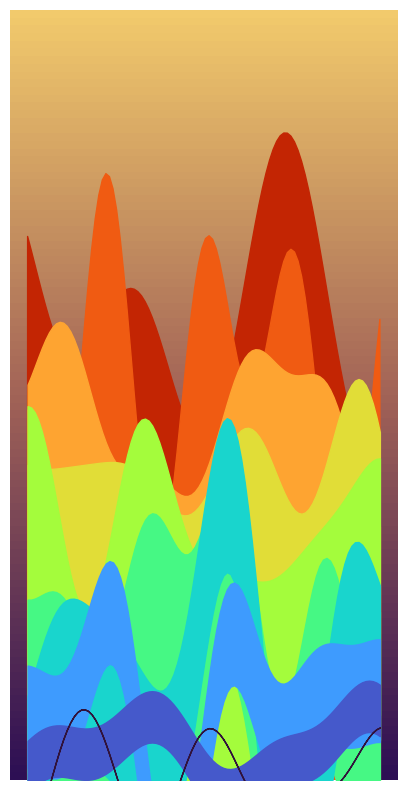

In [27]:
from matplotlib.colors import LinearSegmentedColormap
from random import choice

def get_rand_color() -> tuple[float, float, float]:
    return (choice(range(255))/255, choice(range(255))/255, choice(range(255))/255)

# define the RGB color values for the gradient
colors = [get_rand_color() for _ in range(3)]
positions = [0, 0.5, 1]

# create LinearSegmentedColormap for the gradient
cmap_background = LinearSegmentedColormap.from_list('vertical_gradient', list(zip(positions, colors)))
gradient = np.linspace(0, 1, 100)


# make a figure
f = plt.figure(figsize=(5, 10))

# get the turbo colormap
cmap_turbo = cm.get_cmap('turbo')

# add a single subplot to the figure
# with empy x ticks and y ticklables
# and no axes shown
ax = f.add_subplot(111, xticks=[], yticks=[])
ax.set_axis_off()

# set the limits to the x and y axes
ax.set_ylim([0, 2 * np.pi])
ax.set_ylim([0, 15])

# create an x array [0, 2π]
x = np.linspace(0, 2 * np.pi, 100)

# set the number of mountain ranges
num_mr = 10

# set the number of peaks in each range
npeak = 10

for i in range(num_mr):
    # set the color of the mountain range
    # by providing a number [0, 1]
    mr_color = cmap_turbo(float(i) / float(npeak))

    # create a frequency
    freq = 3 * np.random.rand(npeak) + 1

    # create a phase
    phase = 2 * np.pi * np.random.rand(npeak)

    # amplitude
    amp = np.random.rand(npeak) + 0.1

    # set an y offset so each range is offset along the y direction
    y_offset = 1 * float(i)

    # create the mountain range
    y = np.zeros_like(x)

    # for every peak
    for j in range(npeak):
        # add this peak as a sine curve
        y += amp[j] * np.sin(freq[j] * x + phase[j])

        # y = np.fabs(y) + y_offset

    plt.fill_between(x, y, y + y_offset, zorder=num_mr-i, color=mr_color, cmap='turbo')

# get axis limits
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

plt.imshow(gradient.reshape(-1, 1), zorder=-1, cmap=cmap_background, aspect='auto', extent=[x_min, x_max, y_min, y_max])

plt.show()